# Import et etudes fichiers

## import

In [183]:
# !pip install gspread
# # Connection à notre google drive pour écrire et importer de la données de nos google sheets par la suite
# from google.colab import auth
# import gspread
# from google.auth import default
# #autenticating to google
# auth.authenticate_user()
# creds, _ = default()
# gc = gspread.authorize(creds)
# from google.colab import files

# installations et imports des autres packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import fonctions as fc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [184]:
# # Augmenter la limite de débit de données IOPub
# from IPython.display import display, HTML
# display(HTML("<script>Jupyter.notebook.kernel.execute('NotebookApp.iopub_data_rate_limit = 10000000')</script>"))

In [185]:
# # Avant d'utiliser df.tail(), configurez les options d'affichage pour afficher toutes les colonnes
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 100)

## Sheet data


In [186]:
# file path
data_file_path = 'C:\\Users\\antoi\\OneDrive\\Bureau\\OC drive\\OC\\P9\\DATA\\DisponibiliteAlimentaire_2017.csv'
df_data = pd.read_csv(data_file_path)

# # Ouvrez la feuille de calcul
# sheet_url = 'https://docs.google.com/spreadsheets/d/1Rfr4o1Fv47qUU2opVdOWbYnuxc4M-5x3YE6uBjTCVSY/edit#gid=2088935678'
# worksheet = gc.open_by_url(sheet_url).sheet1
# # Obtenez les données sous forme de liste de listes
# data = worksheet.get_all_values()
# # Transformez les données en un DataFrame
# df_data = pd.DataFrame(data)
# # Vous pouvez également définir la première ligne comme en-têtes de colonne
# df_data.columns = df_data.iloc[0]
# df_data = df_data[1:]
# # Affichez les 5 premières lignes du DataFrame
# df_data.tail()

In [187]:
# def etude_fichier_complet(df):
#     # Étape 1 : Aperçu des données
#     print("Aperçu des premières lignes :")
#     print(df.sample(3))
    
#     # Étape 2 : Informations sur les colonnes et les types de données
#     print("\nInformations sur les colonnes et les types de données :")
#     print(df.info())
    
#     # Étape 3 : Statistiques descriptives
#     print("\nStatistiques descriptives :")
#     print(df.describe())
    
#     # Étape 4 : Gestion des données manquantes
#     print("\nGestion des données manquantes :")
#     print(df.isnull().sum())
    
#     # Étape 5 : Analyse exploratoire des données (EDA)
#     print("\nAnalyse exploratoire des données :")
    
#     # Distribution des variables numériques
#     num_cols = df.select_dtypes(include=['int64', 'float64']).columns
#     for col in num_cols:
#         plt.figure(figsize=(8, 4))
#         sns.histplot(df[col], bins=20, kde=True)
#         plt.title(f'Distribution de {col}')
#         plt.show()
        
#     # Analyse des variables catégoriques
#     cat_cols = df.select_dtypes(include=['object']).columns
#     for col in cat_cols:
#         plt.figure(figsize=(8, 4))
#         sns.countplot(data=df, x=col)
#         plt.title(f'Fréquence de {col}')
#         plt.xticks(rotation=45)
#         plt.show()

In [188]:
# Utilisation de la fonction
fc.etude_fichier(df_data)

Nombre de colonnes : (176600, 14)

Le type est : 
 Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

Nombre de valeurs uniques :
Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole     

**Unités**

Unité = 'Milliers de tonnes', 'kg', Kcal/personne/jour', 'g/personne/jour'

Description du Symbole = 'Données standardisées', 'Donnée calculée'

In [189]:
# Sélection des colonnes
colonnes_a_supprimer = ['Code Domaine', 'Code zone','Description du Symbole', 'Code Élément', 'Code Produit',  'Code année', 'Symbole', "Domaine"]

# Supprimer les colonnes du dataframe final
df_data = df_data.drop(columns=colonnes_a_supprimer)

# Afficher les premières lignes du nouveau dataframe
df_data.head()

,Zone,Élément,Produit,Année,Unité,Valeur
0,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.0
2,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.0


## sheet population

In [190]:
# file path
population_file_path = "C:\\Users\\antoi\\OneDrive\\Bureau\\OC drive\\OC\\P9\\DATA\\Population_2000_2018.csv"
df_population = pd.read_csv(population_file_path)

### Drive

In [191]:
# # Ouvrez la feuille de calcul
# sheet_url = 'https://docs.google.com/spreadsheets/d/1p8doV6_TWwk1O5X5ElHmpqkp7P_Pz_XaJywvEdUqPHU/edit#gid=260060951'
# worksheet = gc.open_by_url(sheet_url).sheet1

# # Obtenez les données sous forme de liste de listes
# data = worksheet.get_all_values()

# # Transformez les données en un DataFrame
# df_population = pd.DataFrame(data)

# # Vous pouvez également définir la première ligne comme en-têtes de colonne
# df_population.columns = df_population.iloc[0]
# df_population = df_population[1:]

# # Affichez les 5 premières lignes du DataFrame
# df_population.tail()

### Etude

In [192]:
fc.etude_fichier(df_population)

Nombre de colonnes : (4411, 15)

Le type est : 
 Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object

Nombre de valeurs uniques :
Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                   

In [193]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['Code Domaine', 'Code zone', 'Code Élément', 'Élément','Code Produit', 'Code année', 'Unité', 'Symbole', 'Description du Symbole', 'Note', "Domaine", "Produit"]

# Supprimer les colonnes du dataframe final
df_population = df_population.drop(columns=colonnes_a_supprimer)

# Renommer la colonne
df_population = df_population.rename(columns={"Valeur": "Population"})

# Afficher les premières lignes du nouveau dataframe
df_population.head()

,Zone,Année,Population
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770
3,Afghanistan,2003,23680.871
4,Afghanistan,2004,24726.684


In [194]:
# Convertion en int
df_population['Population'] = pd.to_numeric(df_population['Population'], errors='coerce')

# Convertion en integer
df_population['Population'] = df_population['Population'].astype(int)

# Multiplier par1000
df_population['Population'] = df_population['Population']*1000

df_population.head()

,Zone,Année,Population
0,Afghanistan,2000,20779000
1,Afghanistan,2001,21606000
2,Afghanistan,2002,22600000
3,Afghanistan,2003,23680000
4,Afghanistan,2004,24726000


# Jointures

In [195]:
# Jointures des deux df
data = pd.merge(df_data, df_population, on=['Zone', 'Année'])
data.head()

,Zone,Élément,Produit,Année,Unité,Valeur,Population
0,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.0,36296000
1,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.0,36296000
2,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.0,36296000
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.0,36296000
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.0,36296000


In [196]:
fc.etude_fichier(data)

Nombre de colonnes : (176600, 7)

Le type est : 
 Zone           object
Élément        object
Produit        object
Année           int64
Unité          object
Valeur        float64
Population      int32
dtype: object

Nombre de valeurs uniques :
Zone           174
Élément         17
Produit         98
Année            1
Unité            4
Valeur        7250
Population     173
dtype: int64

Le nombre de valeurs manquantes :
 Zone          0
Élément       0
Produit       0
Année         0
Unité         0
Valeur        0
Population    0
dtype: int64


# Manipulation des données

## étude des catégories à gardr pour l'analyse

In [197]:
data.head()

,Zone,Élément,Produit,Année,Unité,Valeur,Population
0,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.0,36296000
1,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.0,36296000
2,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.0,36296000
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.0,36296000
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.0,36296000


In [198]:
# ragarder quelles sont les éléments et le nombre de lignes
unique_elements_with_counts_elements = data['Élément'].value_counts()
print(unique_elements_with_counts_elements)

Élément
Disponibilité intérieure                                         15905
Importations - Quantité                                          15260
Disponibilité alimentaire en quantité (kg/personne/an)           14618
Disponibilité de matière grasse en quantité (g/personne/jour)    14512
Disponibilité de protéines en quantité (g/personne/jour)         14507
Nourriture                                                       14498
Disponibilité alimentaire (Kcal/personne/jour)                   14476
Résidus                                                          12567
Exportations - Quantité                                          12113
Variation de stock                                               11299
Production                                                       10334
Pertes                                                            5813
Alimentation pour touristes                                       5560
Autres utilisations (non alimentaire)                             529

In [199]:
# Regadrer quelles sont les unités et le nombre de lignes
unique_elements_with_counts_products = data['Produit'].value_counts()
print(unique_elements_with_counts_products)

Produit
Maïs et produits                   2593
Blé et produits                    2581
Pommes de Terre et produits        2486
Riz et produits                    2452
Lait - Excl Beurre                 2395
Oeufs                              2347
Légumineuses Autres et produits    2336
Orge et produits                   2301
Soja                               2222
Céréales, Autres                   2206
Légumes, Autres                    2204
Fruits, Autres                     2198
Arachides Decortiquees             2197
Edulcorants Autres                 2194
Haricots                           2141
Sucre Eq Brut                      2137
Graisses Animales Crue             2137
Feve de Cacao et produits          2088
Huil Plantes Oleif Autr            2083
Plantes Oleiferes, Autre           2077
Viande de Bovins                   2065
Viande de Volailles                2061
Avoine                             2060
Coco (Incl Coprah)                 2051
Tomates et produits             

In [200]:
# Regadrer quelles sont les unités et le nombre de lignes
unique_elements_with_counts_units = data['Unité'].value_counts()
print(unique_elements_with_counts_units)

Unité
Milliers de tonnes    118487
g/personne/jour        29019
kg                     14618
Kcal/personne/jour     14476
Name: count, dtype: int64


### Modificatyion pour avoir les résultats dans des unités cohérentes

In [201]:
# ajout d'une colonne pour faire les moidifcations d'unités
data['Nombres de jour'] = 365
print(data.shape)

(176600, 8)


In [202]:
# Identifier les lignes où l'unité est "Milliers de tonnes"
is_milliers_de_tonnes = data['Unité'] == "Milliers de tonnes"

# Convertir les valeurs en kilogrammes pour ces lignes
data.loc[is_milliers_de_tonnes, 'Valeur'] *= 1_000_000

# Mettre à jour l'unité pour ces lignes
data.loc[is_milliers_de_tonnes, 'Unité'] = 'kg'

In [203]:
# Identifier les lignes où l'unité est "g/personne/jour"
is_g_per_person_per_day = data['Unité'] == "g/personne/jour"

# Effectuer le calcul en tenant compte de la population et du nombre de jours
data.loc[is_g_per_person_per_day, 'Valeur'] *= data.loc[is_g_per_person_per_day, 'Population'] * data.loc[is_g_per_person_per_day, 'Nombres de jour']

# Convertir les valeurs en kilogrammes pour ces lignes
data.loc[is_g_per_person_per_day, 'Valeur'] *=0.001  # Convertir les grammes en kilogrammes

# Mettre à jour l'unité pour ces lignes
data.loc[is_g_per_person_per_day, 'Unité'] = 'kg'

In [204]:
# Identifier les lignes où l'unité est "Kcal/personne/jour"
is_kcal_per_person_per_day = data['Unité'] == "Kcal/personne/jour"

# Effectuer le calcul en tenant compte de la population et du nombre de jours
data.loc[is_kcal_per_person_per_day, 'Valeur'] *= data.loc[is_kcal_per_person_per_day, 'Population'] * data.loc[is_kcal_per_person_per_day, 'Nombres de jour']

# Mettre à jour l'unité pour ces lignes
data.loc[is_kcal_per_person_per_day, 'Unité'] = 'Kcal'

In [205]:
# Liste des produits pertinents pour l'étude de cas sur la vente de poulet
produits_pertinents = [
    "Viande de Volailles",
    "Oeufs",
    #"Aliments pour enfants",
    "Miscellanées",
    "Viande de Bovins",
    "Viande d'Ovins/Caprins",
    "Viande de Suides",
    "Abats Comestible",
    "Graisses Animales Crue",
    "Lait - Excl Beurre",
    "Poissons Eau Douce",
    "Poissons Marins, Autres",
    "Crustacés",
    "Cephalopodes",
    "Mollusques, Autres"
]

# Filtrer le dataframe pour ne garder que les données concernant les produits pertinents
data_filtree = data[data['Produit'].isin(produits_pertinents)]

data_filtree.head()
print(data_filtree.shape)

(25682, 8)


In [206]:
# Liste des éléments pertinents pour l'analyse de la vente de poulet
elements_pertinents = [
    "Production",
    "Importations - Quantité",
    "Exportations - Quantité",
    "Disponibilité intérieure",
    "Consommation alimentaire",
    "Pertes"
]

# Filtrer le dataframe pour ne garder que les données concernant les éléments pertinents
data_filtree_elements = data_filtree[data_filtree['Élément'].isin(elements_pertinents)].reset_index()

print(data_filtree_elements.head())
print(data_filtree_elements.shape)

   index         Zone                   Élément                 Produit  \
0    622  Afghanistan                Production        Viande de Bovins   
1    623  Afghanistan   Importations - Quantité        Viande de Bovins   
2    625  Afghanistan  Disponibilité intérieure        Viande de Bovins   
3    626  Afghanistan                    Pertes        Viande de Bovins   
4    633  Afghanistan                Production  Viande d'Ovins/Caprins   

   Année Unité       Valeur  Population  Nombres de jour  
0   2017    kg   94000000.0    36296000              365  
1   2017    kg    6000000.0    36296000              365  
2   2017    kg  100000000.0    36296000              365  
3   2017    kg    5000000.0    36296000              365  
4   2017    kg  160000000.0    36296000              365  
(9012, 9)


In [207]:
data_filtree_elements.head()

,index,Zone,Élément,Produit,Année,Unité,Valeur,Population,Nombres de jour
0,622,Afghanistan,Production,Viande de Bovins,2017,kg,94000000.0,36296000,365
1,623,Afghanistan,Importations - Quantité,Viande de Bovins,2017,kg,6000000.0,36296000,365
2,625,Afghanistan,Disponibilité intérieure,Viande de Bovins,2017,kg,100000000.0,36296000,365
3,626,Afghanistan,Pertes,Viande de Bovins,2017,kg,5000000.0,36296000,365
4,633,Afghanistan,Production,Viande d'Ovins/Caprins,2017,kg,160000000.0,36296000,365


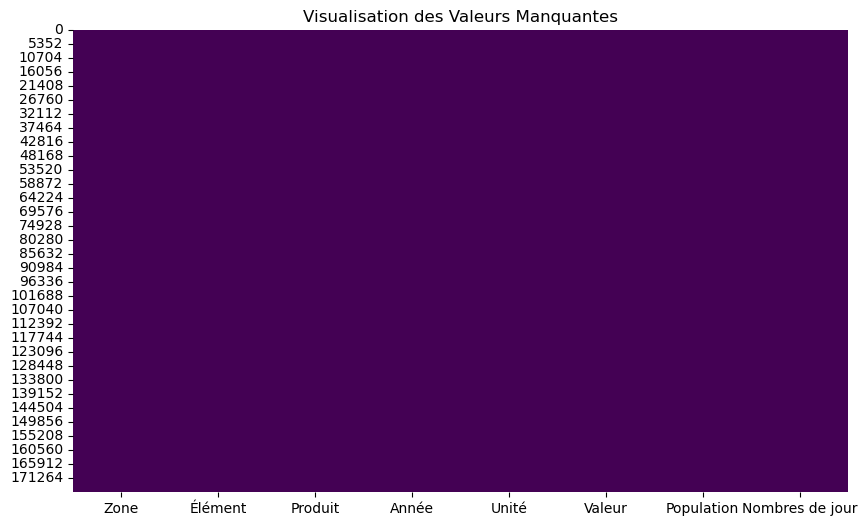

In [208]:
fc.visualiser_valeurs_manquantes(data)

In [209]:
data_filtree_elements.describe()

,index,Année,Valeur,Population,Nombres de jour
count,9012.000000,9012.0,9.012000e+03,9.012000e+03,9012.0
mean,88902.019086,2017.0,3.446170e+08,4.562873e+07,365.0
std,50898.630133,0.0,3.548385e+09,1.605361e+08,0.0
min,622.000000,2017.0,-8.280000e+08,5.200000e+04,365.0
25%,44652.250000,2017.0,0.000000e+00,2.920000e+06,365.0
50%,89380.000000,2017.0,5.000000e+06,9.845000e+06,365.0
75%,132464.250000,2017.0,4.900000e+07,3.144400e+07,365.0
max,176558.000000,2017.0,1.762750e+11,1.421021e+09,365.0


## début de l'analsye

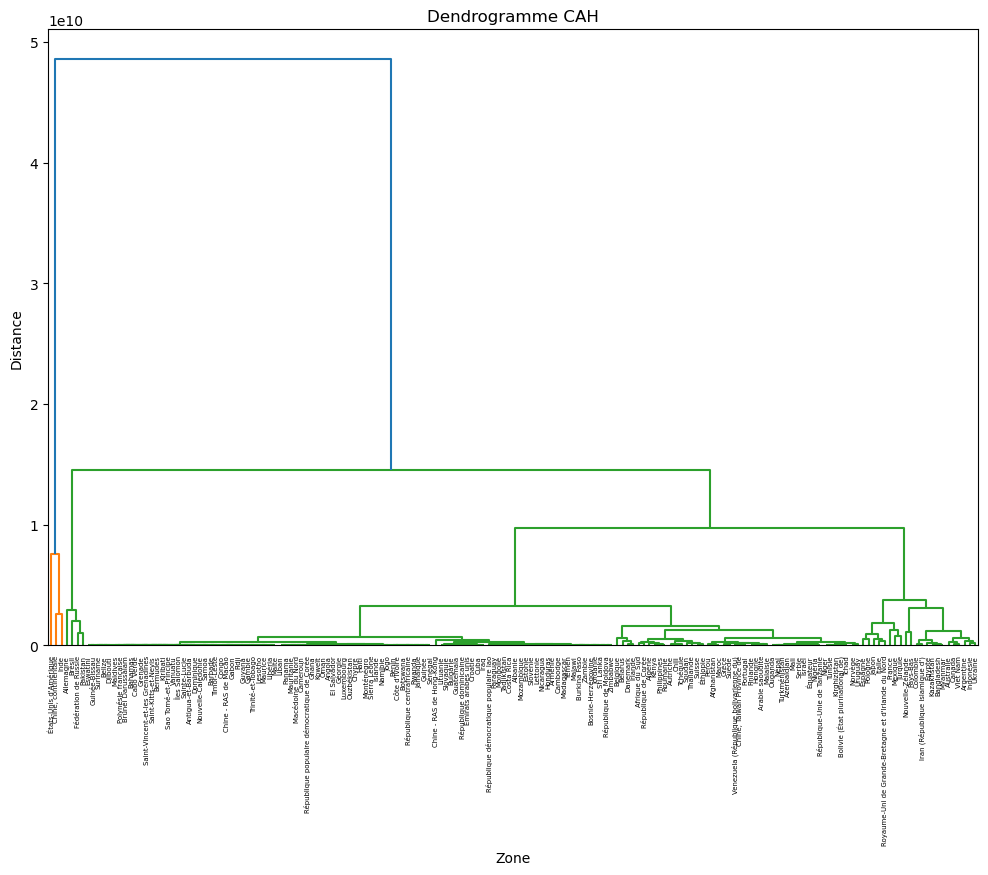

In [210]:
# Préparation des données pour la CAH
data_cah = data_filtree_elements.pivot_table(index='Zone', columns='Élément', values='Valeur', fill_value=0)

# Calcul de la matrice de liaison
Z = linkage(data_cah, method='ward')

# Affichage du dendrogramme
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=data_cah.index)
plt.title('Dendrogramme CAH')
plt.xlabel('Zone')
plt.ylabel('Distance')
plt.show()

In [211]:
data_cah.head()

Élément,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Production
Zone,,,,,
Afghanistan,2.953333e+08,0.000000e+00,1.888889e+07,1.800000e+07,3.112500e+08
Afrique du Sud,5.990000e+08,5.376923e+07,7.946154e+07,5.950000e+07,5.728462e+08
Albanie,1.076154e+08,1.818182e+05,6.769231e+06,1.650000e+07,1.014615e+08
Algérie,4.956923e+08,3.000000e+05,1.583846e+08,2.957143e+07,3.376154e+08
Allemagne,2.763077e+09,1.675923e+09,1.109615e+09,1.280000e+07,3.334308e+09


In [212]:
type(data_cah)

pandas.core.frame.DataFrame

In [213]:
# Réinitialisez l'index pour obtenir un DataFrame
data_cah_df = data_cah.reset_index()

# Affichez le DataFrame résultant
data_cah_df.head()

Élément,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Production
0,Afghanistan,2.953333e+08,0.000000e+00,1.888889e+07,1.800000e+07,3.112500e+08
1,Afrique du Sud,5.990000e+08,5.376923e+07,7.946154e+07,5.950000e+07,5.728462e+08
2,Albanie,1.076154e+08,1.818182e+05,6.769231e+06,1.650000e+07,1.014615e+08
3,Algérie,4.956923e+08,3.000000e+05,1.583846e+08,2.957143e+07,3.376154e+08
4,Allemagne,2.763077e+09,1.675923e+09,1.109615e+09,1.280000e+07,3.334308e+09


In [214]:
print(fc.detecter_outliers(data_cah, 'Disponibilité intérieure', seuil=2.0))
print(fc.detecter_outliers(data_cah, 'Exportations - Quantité', seuil=2.0))
print(fc.detecter_outliers(data_cah, 'Importations - Quantité', seuil=2.0))
print(fc.detecter_outliers(data_cah, 'Pertes', seuil=2.0))
print(fc.detecter_outliers(data_cah, 'Production', seuil=2.0))

Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2 dans la colonne 'Disponibilité intérieure' est 2.3%
None
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2 dans la colonne 'Exportations - Quantité' est 2.87%
None
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2 dans la colonne 'Importations - Quantité' est 6.9%
None
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2 dans la colonne 'Pertes' est 3.45%
None
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2 dans la colonne 'Production' est 2.3%
None


In [215]:
# Pivotez les données pour transformer les unités en colonnes
pivot_data_filtree = data_filtree_elements.pivot_table(index=['Zone','Produit'],
                              columns='Élément', values='Valeur', aggfunc='sum',fill_value=0).reset_index()
# Afficher les premières lignes du nouveau dataframe
pivot_data_filtree.head()

Élément,Zone,Produit,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Production
0,Afghanistan,Abats Comestible,53000000,0,6000000,0,48000000
1,Afghanistan,Graisses Animales Crue,15000000,0,1000000,0,15000000
2,Afghanistan,Lait - Excl Beurre,2190000000,0,74000000,67000000,2116000000
3,Afghanistan,Oeufs,74000000,0,54000000,7000000,20000000
4,Afghanistan,Poissons Eau Douce,9000000,0,0,0,9000000


In [216]:
# Calcul des statistiques descriptives pour le dataframe pivoté
descriptive_stats_pivot = pivot_data_filtree.describe()
descriptive_stats_pivot

Élément,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Production
count,2.222000e+03,2.222000e+03,2.222000e+03,2.222000e+03,2.222000e+03
mean,5.918501e+08,9.837084e+07,7.597840e+07,1.439694e+07,6.171031e+08
std,4.928539e+09,7.889718e+08,4.197104e+08,1.351261e+08,5.070652e+09
min,-8.280000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.600000e+07,0.000000e+00,2.000000e+06,0.000000e+00,1.100000e+07
75%,1.160000e+08,6.750000e+06,1.900000e+07,1.000000e+06,1.037500e+08
max,1.760180e+11,2.065400e+10,1.037600e+10,3.580000e+09,1.762750e+11


### éude outliers

In [217]:
print(fc.detecter_outliers(pivot_data_filtree, 'Disponibilité intérieure', seuil=2.0))
print(fc.detecter_outliers(pivot_data_filtree, 'Exportations - Quantité', seuil=2.0))
print(fc.detecter_outliers(pivot_data_filtree, 'Importations - Quantité', seuil=2.0))
print(fc.detecter_outliers(pivot_data_filtree, 'Pertes', seuil=2.0))
print(fc.detecter_outliers(pivot_data_filtree, 'Production', seuil=2.0))

Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2 dans la colonne 'Disponibilité intérieure' est 0.9%
None
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2 dans la colonne 'Exportations - Quantité' est 0.95%
None
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2 dans la colonne 'Importations - Quantité' est 1.49%
None
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2 dans la colonne 'Pertes' est 0.81%
None
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2 dans la colonne 'Production' est 1.08%
None


### dendogramme

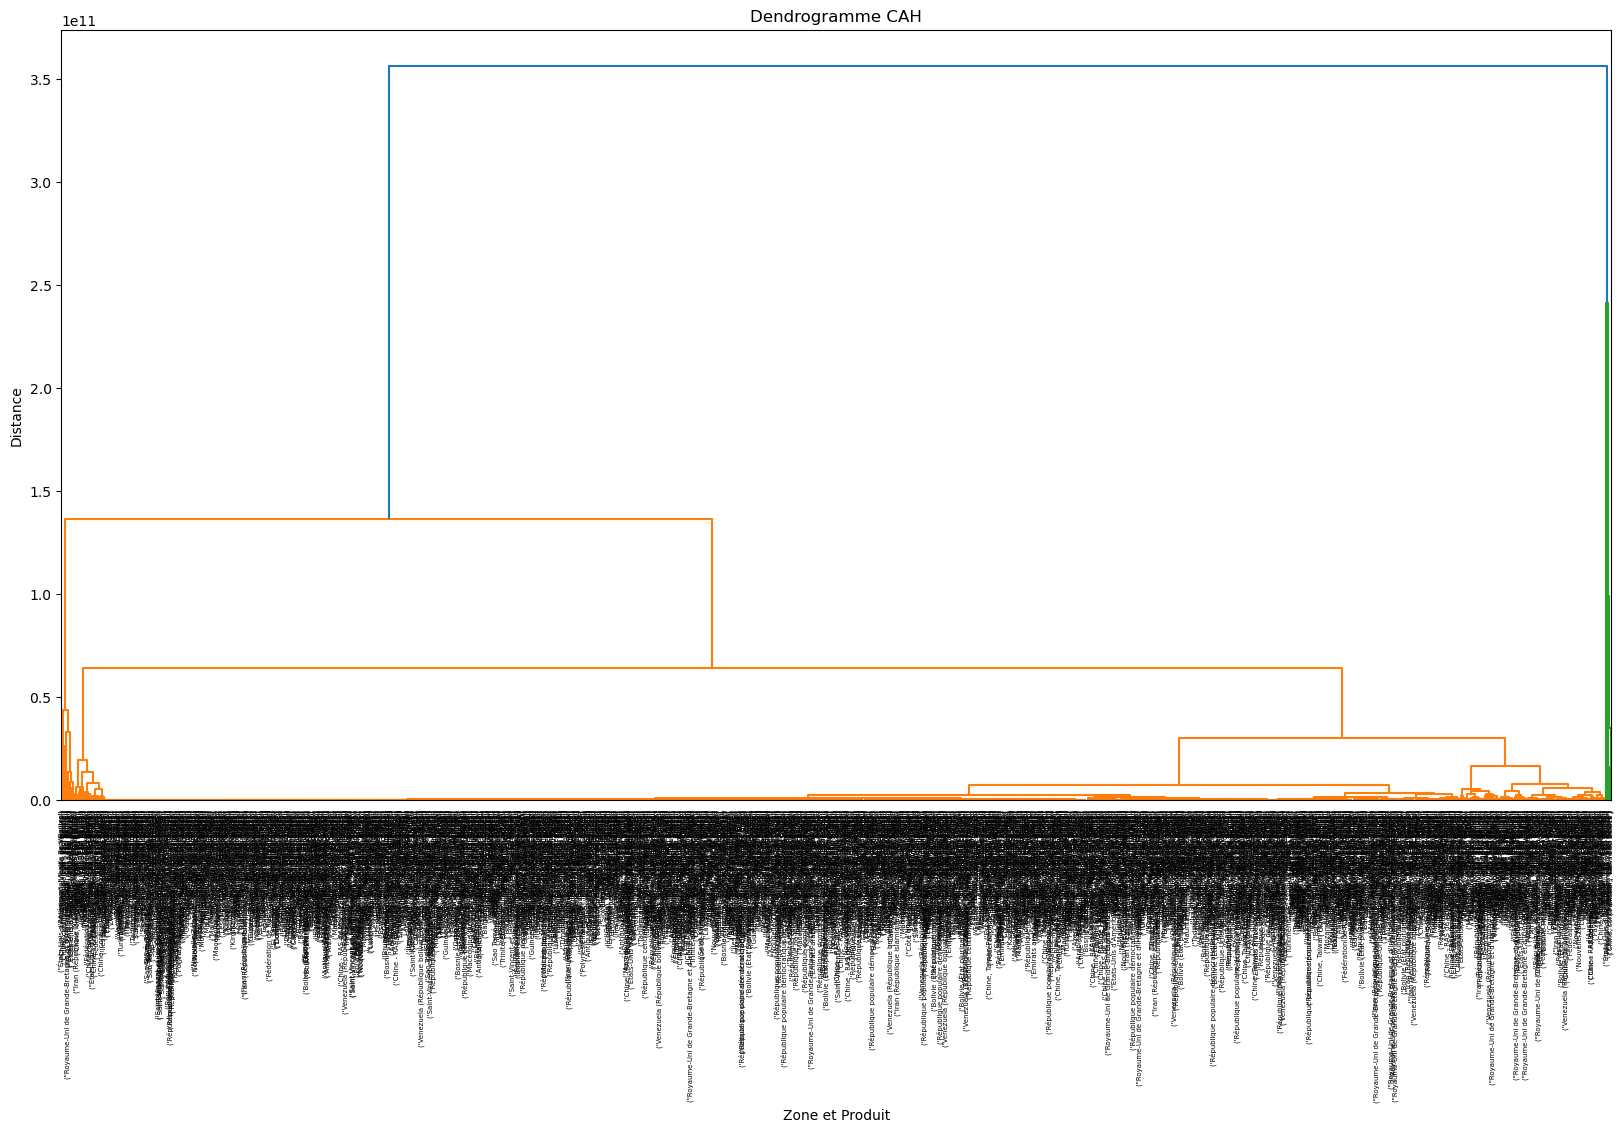

In [218]:
# Préparation des données pour la CAH
data_cah_pivot = pivot_data_filtree.set_index(['Zone', 'Produit']).fillna(0)

# Calcul de la matrice de liaison
Z_pivot = linkage(data_cah_pivot, method='ward')

# Affichage du dendrogramme
plt.figure(figsize=(20, 10))
dendrogram(Z_pivot, labels=data_cah_pivot.index)
plt.title('Dendrogramme CAH')
plt.xlabel('Zone et Produit')
plt.ylabel('Distance')
plt.show()

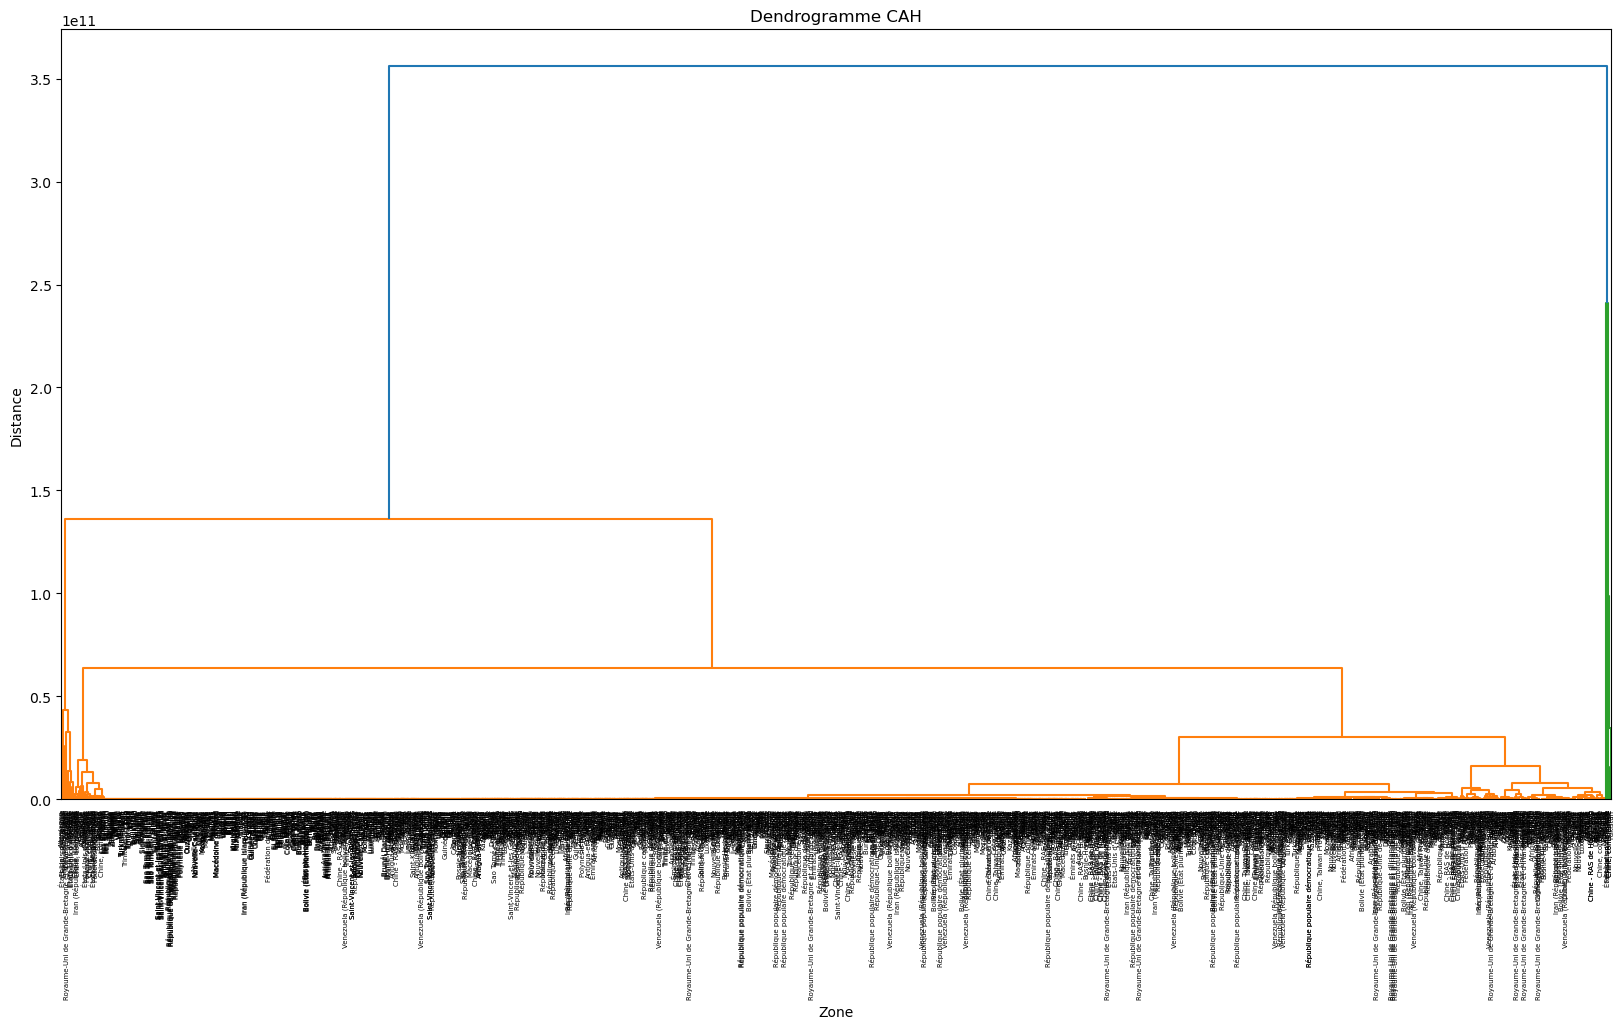

In [219]:
# Drop the 'Produit' column if it's non-numeric
data_cah_pivot = pivot_data_filtree.drop('Produit', axis=1).set_index(['Zone']).fillna(0)

# Calcul de la matrice de liaison
Z_pivot = linkage(data_cah_pivot, method='ward')

# Affichage du dendrogramme
plt.figure(figsize=(20, 10))
dendrogram(Z_pivot, labels=data_cah_pivot.index)
plt.title('Dendrogramme CAH')
plt.xlabel('Zone')
plt.ylabel('Distance')
plt.show()

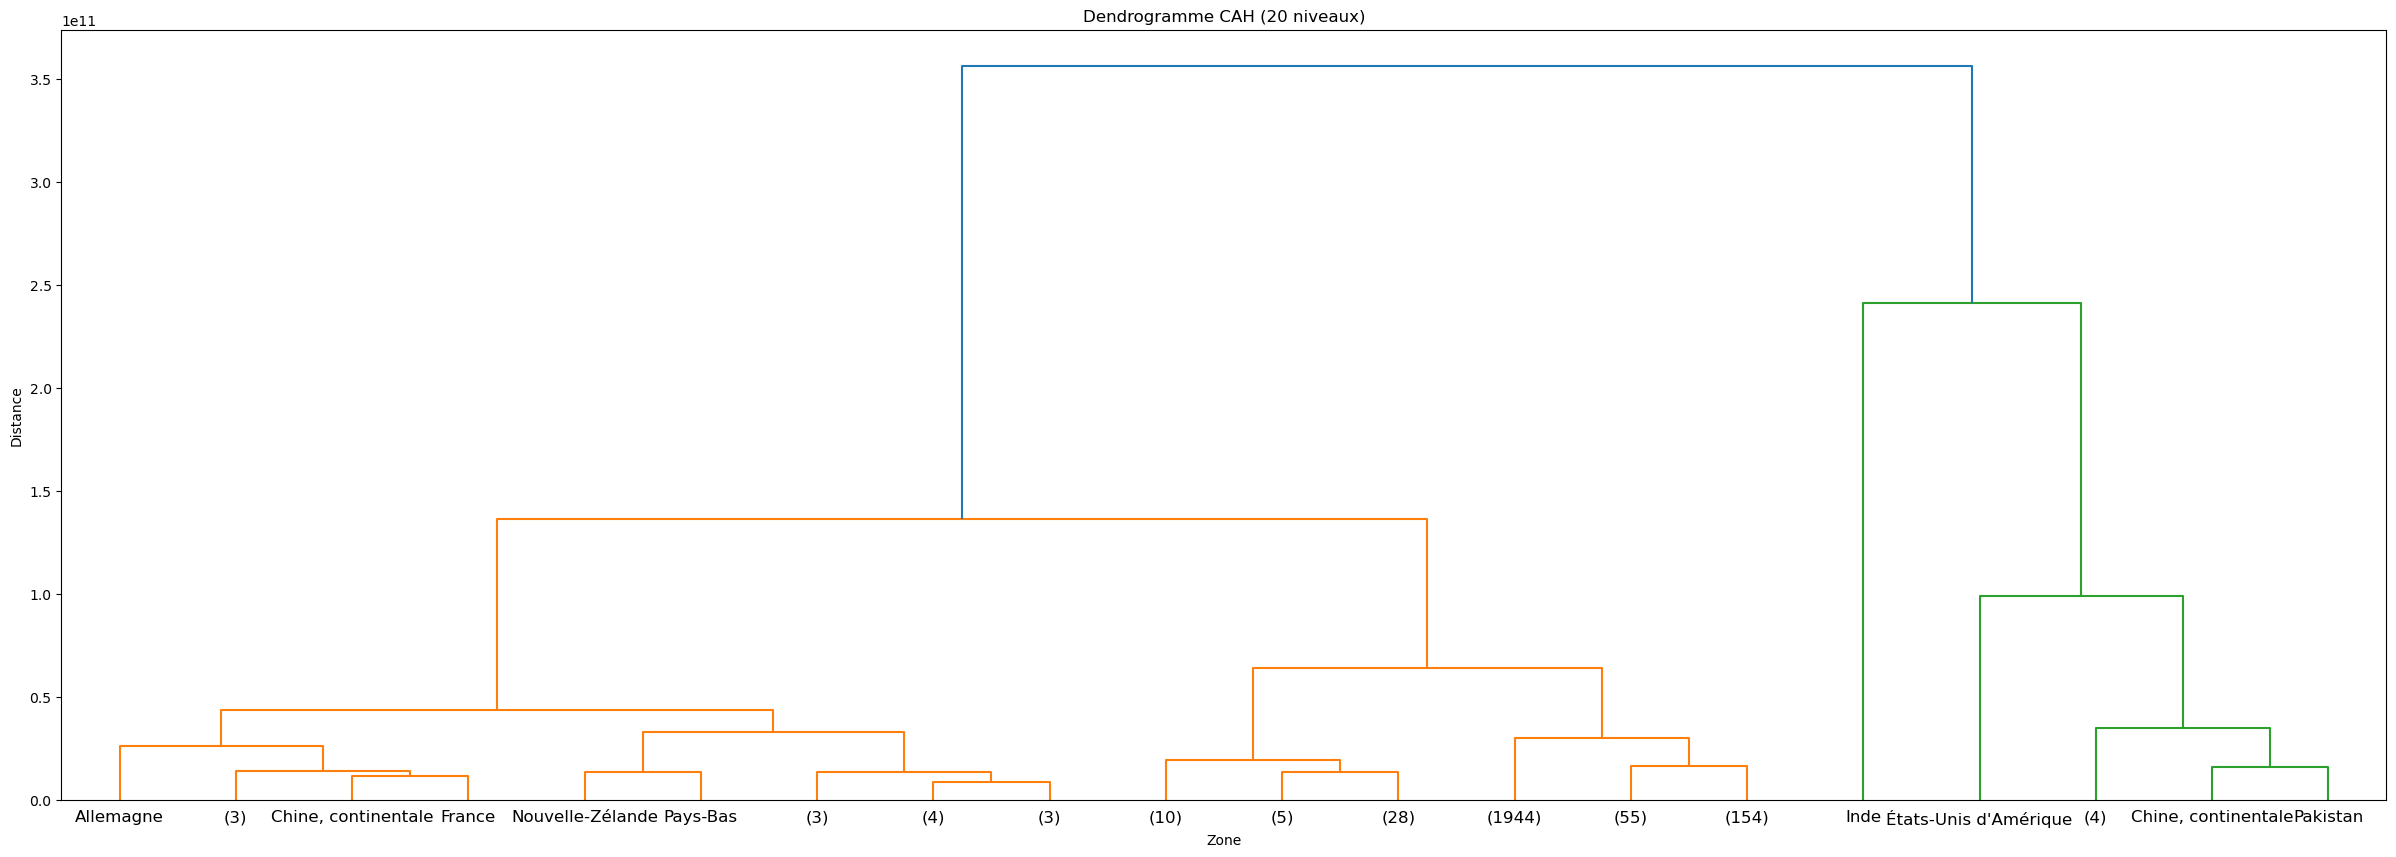

In [220]:
# Drop the 'Produit' column if it's non-numeric
data_cah_pivot = pivot_data_filtree.drop('Produit', axis=1).set_index(['Zone']).fillna(0)

# Calcul de la matrice de liaison
Z_pivot = linkage(data_cah_pivot, method='ward')

# Affichage du dendrogramme avec un nombre limité de niveaux (par exemple, 5 niveaux)
plt.figure(figsize=(30, 10))
dendrogram(Z_pivot, labels=data_cah_pivot.index, truncate_mode='lastp', p=20)
plt.title('Dendrogramme CAH (20 niveaux)')
plt.xlabel('Zone')
plt.ylabel('Distance')
plt.show()

### Kmeans

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

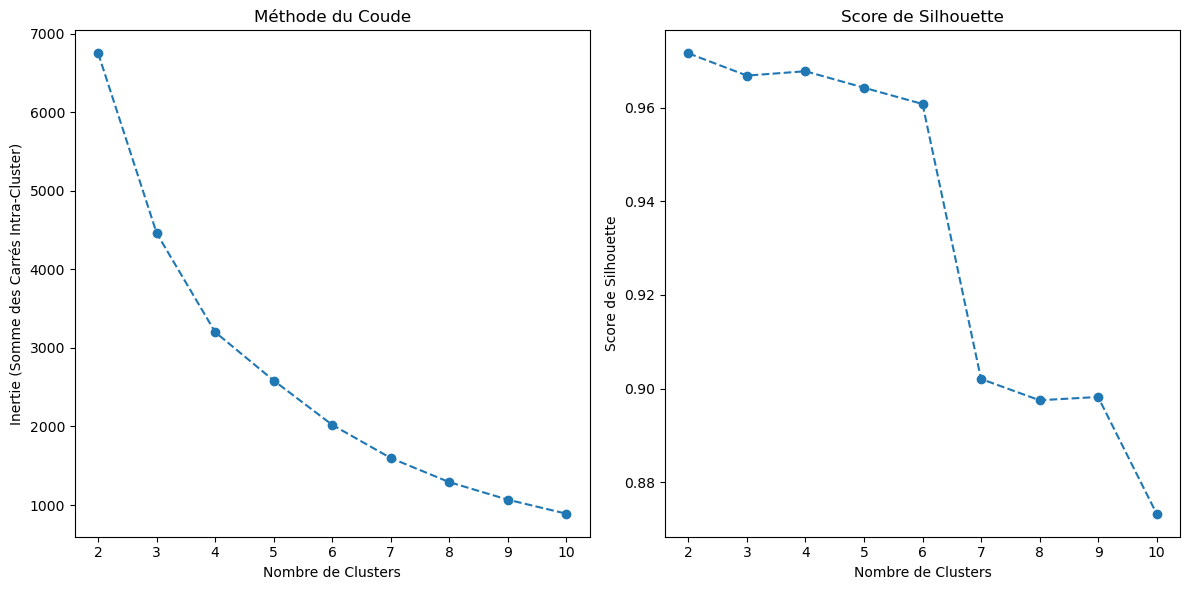

In [221]:
# Standardisation des données pour K-Means
scaler = StandardScaler()
data_scaled_pivot = scaler.fit_transform(data_cah_pivot)

# Définir une plage de nombres de clusters à tester
plage_de_clusters = range(2, 11)  # Vous pouvez ajuster la plage selon vos besoins

# Listes pour stocker l'inertie et les scores de silhouette
valeurs_inertie = []
scores_silhouette = []

# Itérer à travers différents nombres de clusters et ajuster K-Means
for n_clusters in plage_de_clusters:
    kmeans_pivot = KMeans(n_clusters=n_clusters, random_state=42)
    clusters_pivot = kmeans_pivot.fit_predict(data_scaled_pivot)
    
    # Calculer l'inertie (somme des carrés intra-cluster)
    valeurs_inertie.append(kmeans_pivot.inertia_)
    
    # Calculer le score de silhouette
    scores_silhouette.append(silhouette_score(data_scaled_pivot, clusters_pivot))

# Tracer la méthode du coude pour déterminer le nombre optimal de clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(plage_de_clusters, valeurs_inertie, marker='o', linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie (Somme des Carrés Intra-Cluster)')
plt.title('Méthode du Coude')

# Tracer le Score de Silhouette pour déterminer le nombre optimal de clusters
plt.subplot(1, 2, 2)
plt.plot(plage_de_clusters, scores_silhouette, marker='o', linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de Silhouette')
plt.title('Score de Silhouette')

plt.tight_layout()
plt.show()

Méthode du Coude (Elbow Method) :

La Méthode du Coude consiste à trouver le point dans un graphique de l'inertie où la diminution de l'inertie ralentit, formant un coude.
Ce point représente généralement le nombre optimal de clusters dans une analyse de clustering.

Score de Silhouette (Silhouette Score) :

Le Score de Silhouette mesure à quel point les points d'un cluster sont similaires entre eux et différents des autres clusters.
Il varie de -1 à 1, où un score élevé indique une meilleure séparation des clusters.
Le nombre optimal de clusters est généralement celui qui donne le score de silhouette le plus élevé.

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


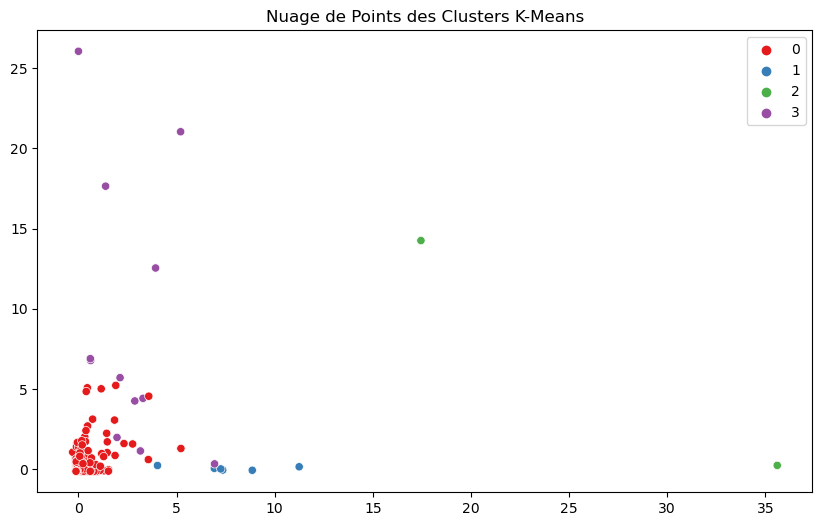

In [222]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardisation des données pour K-Means
scaler = StandardScaler()
data_scaled_pivot = scaler.fit_transform(data_cah_pivot)

# Application de K-Means
kmeans_pivot = KMeans(n_clusters=4)  # Ajuster le nombre de clusters
clusters_pivot = kmeans_pivot.fit_predict(data_scaled_pivot)

# Assigner les clusters aux données originales
pivot_data_filtree['Cluster'] = clusters_pivot

import matplotlib.pyplot as plt
import seaborn as sns

# Créez un nuage de points en utilisant seaborn pour visualiser les clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_scaled_pivot, x=data_scaled_pivot[:, 0], y=data_scaled_pivot[:, 1], hue=clusters_pivot, palette='Set1')
plt.title('Nuage de Points des Clusters K-Means')
plt.xlabel('')
plt.ylabel('')
plt.show()


### PCA

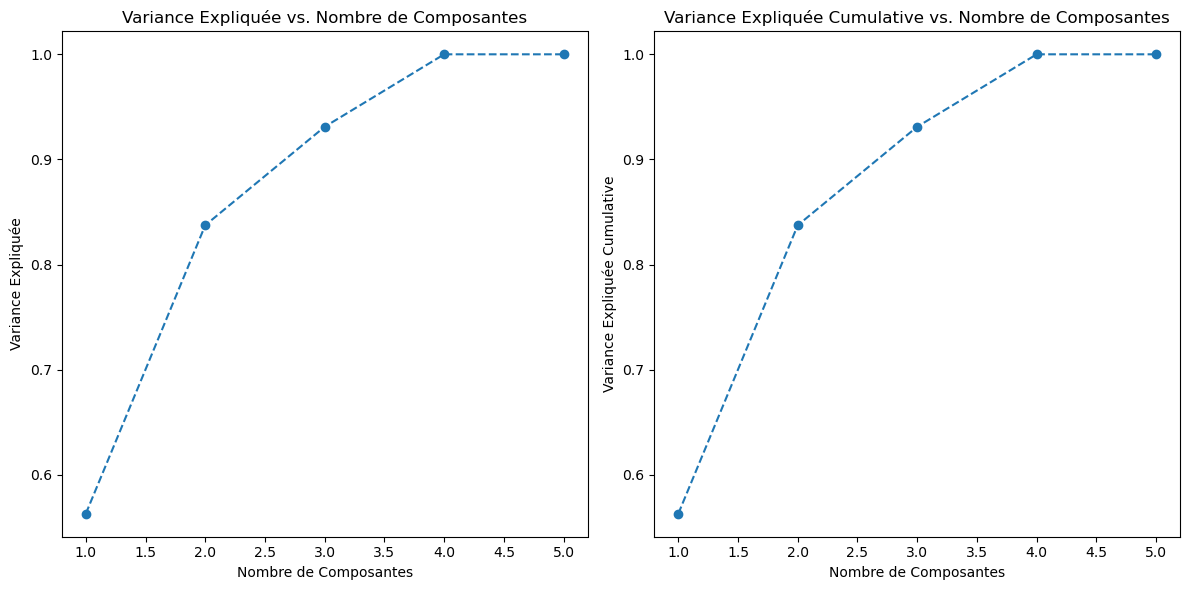

In [223]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Définir une plage de nombres de composantes à tester
plage_de_composantes = range(1, data_scaled_pivot.shape[1] + 1)

# Listes pour stocker la variance expliquée et la variance expliquée cumulative
variance_expliquee = []
variance_expliquee_cumulative = []

# Itérer à travers différents nombres de composantes
for n_composantes in plage_de_composantes:
    pca_pivot = PCA(n_components=n_composantes)
    composantes_principales_pivot = pca_pivot.fit_transform(data_scaled_pivot)
    
    # Calculer la variance expliquée et la variance expliquée cumulative
    variance_expliquee.append(np.sum(pca_pivot.explained_variance_ratio_))
    variance_expliquee_cumulative.append(np.sum(pca_pivot.explained_variance_ratio_))

# Tracer la variance expliquée et la variance expliquée cumulative
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(plage_de_composantes, variance_expliquee, marker='o', linestyle='--')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Expliquée')
plt.title('Variance Expliquée vs. Nombre de Composantes')

plt.subplot(1, 2, 2)
plt.plot(plage_de_composantes, variance_expliquee_cumulative, marker='o', linestyle='--')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Expliquée Cumulative')
plt.title('Variance Expliquée Cumulative vs. Nombre de Composantes')

plt.tight_layout()
plt.show()


Variance Expliquée :

La variance expliquée est la proportion de la variance totale des données qui est expliquée par un certain nombre de composantes principales dans une analyse en composantes principales (PCA).
Elle mesure combien d'informations des données originales sont conservées dans ces composantes principales.

Variance Expliquée Cumulative :

La variance expliquée cumulative est la somme cumulative des variances expliquées par chaque composante principale.
Elle montre comment la proportion de variance totale expliquée augmente à mesure que l'on ajoute davantage de composantes principales.
Elle aide à déterminer combien de composantes principales sont nécessaires pour conserver une quantité suffisante d'information dans les données originales.

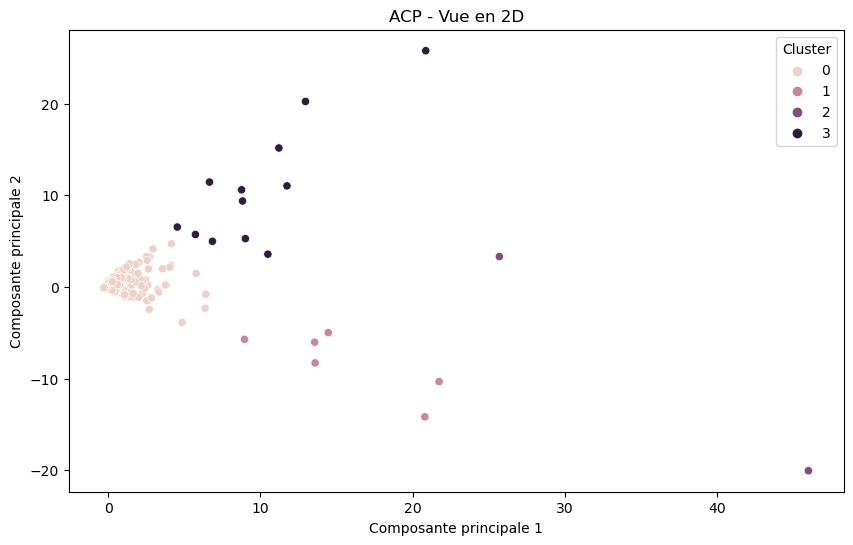

In [224]:
from sklearn.decomposition import PCA

# Application de l'ACP
pca_pivot = PCA(n_components=2)  # Ajuster le nombre de composantes
principal_components_pivot = pca_pivot.fit_transform(data_scaled_pivot)

# Visualisation des résultats de l'ACP
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components_pivot[:, 0], y=principal_components_pivot[:, 1], hue=pivot_data_filtree['Cluster'])
plt.title('ACP - Vue en 2D')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

### Correlations

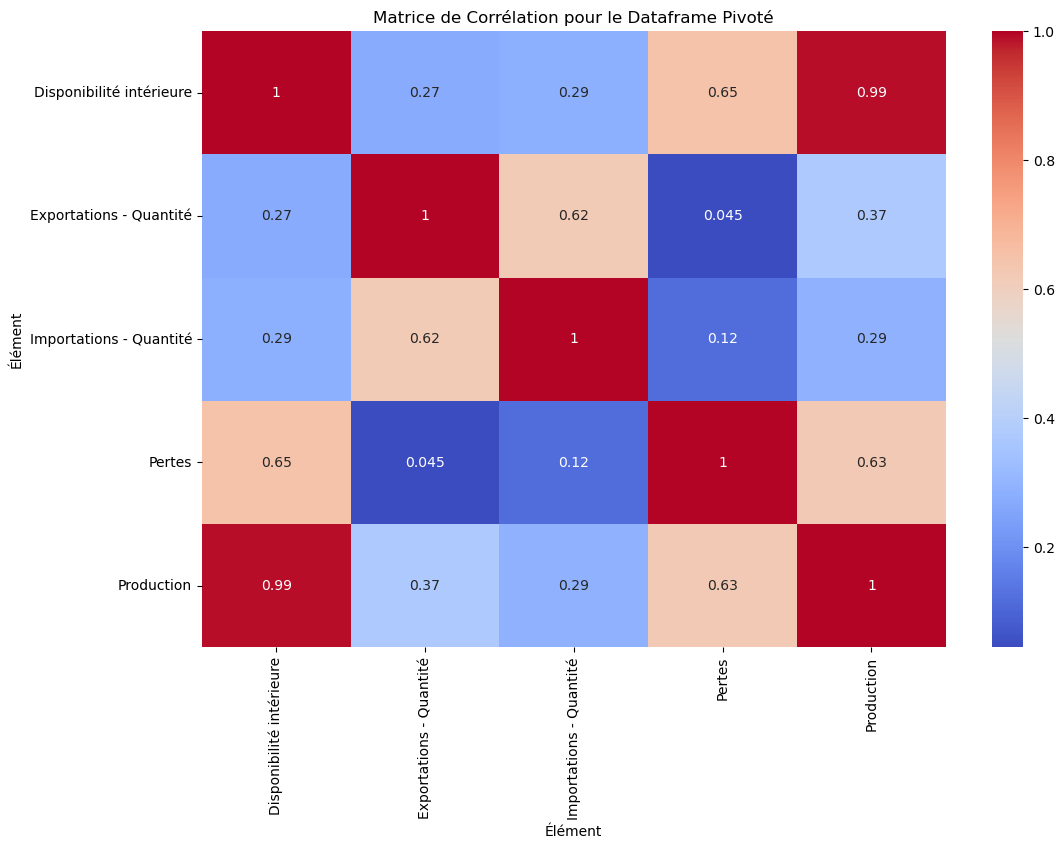

In [225]:
# Calcul de la matrice de corrélation pour le dataframe pivoté
correlation_matrix_pivot = data_cah_pivot.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_pivot, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation pour le Dataframe Pivoté')
plt.show()

# Autre idée

### test

In [226]:
# Pivotez les données pour transformer les unités en colonnes
pivot_data = data.pivot_table(index=['Zone', 'Élément', 'Produit', 'Année'],
                              columns='Unité', values='Valeur', aggfunc='sum').reset_index()
# Afficher les premières lignes du nouveau dataframe
pivot_data.head()

Unité,Zone,Élément,Produit,Année,Kcal,kg
0,Afghanistan,Aliments pour animaux,Arachides Decortiquees,2017,NaN,1000000.0
1,Afghanistan,Aliments pour animaux,Blé et produits,2017,NaN,76000000.0
2,Afghanistan,Aliments pour animaux,Coco (Incl Coprah),2017,NaN,1000000.0
3,Afghanistan,Aliments pour animaux,"Céréales, Autres",2017,NaN,0.0
4,Afghanistan,Aliments pour animaux,Graines Colza/Moutarde,2017,NaN,1000000.0


In [227]:
# Fusionnez le dataframe initial avec le dataframe pivot
data = pd.merge(data, pivot_data, how='left', on=[ 'Zone', 'Élément','Produit', 'Année'])
# Afficher les premières lignes du nouveau dataframe
data.head(10)

,Zone,Élément,Produit,Année,Unité,Valeur,Population,Nombres de jour,Kcal,kg
0,Afghanistan,Production,Blé et produits,2017,kg,4.281000e+09,36296000,365,NaN,4.281000e+09
1,Afghanistan,Importations - Quantité,Blé et produits,2017,kg,2.302000e+09,36296000,365,NaN,2.302000e+09
2,Afghanistan,Variation de stock,Blé et produits,2017,kg,-1.190000e+08,36296000,365,NaN,-1.190000e+08
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,kg,0.000000e+00,36296000,365,NaN,0.000000e+00
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,kg,6.701000e+09,36296000,365,NaN,6.701000e+09
5,Afghanistan,Aliments pour animaux,Blé et produits,2017,kg,7.600000e+07,36296000,365,NaN,7.600000e+07
6,Afghanistan,Semences,Blé et produits,2017,kg,3.440000e+08,36296000,365,NaN,3.440000e+08
7,Afghanistan,Pertes,Blé et produits,2017,kg,6.420000e+08,36296000,365,NaN,6.420000e+08
8,Afghanistan,Résidus,Blé et produits,2017,kg,0.000000e+00,36296000,365,NaN,0.000000e+00
9,Afghanistan,Nourriture,Blé et produits,2017,kg,5.640000e+09,36296000,365,NaN,5.640000e+09


In [228]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['Valeur', 'Nombres de jour'] #'Kcal', 'Unité', 'Année']

# Utilisation de la méthode drop pour supprimer les colonnes dans le DataFrame d'origine
data.drop(columns=colonnes_a_supprimer, inplace=True)

# Afficher les premières lignes du nouveau dataframe
data.head()

,Zone,Élément,Produit,Année,Unité,Population,Kcal,kg
0,Afghanistan,Production,Blé et produits,2017,kg,36296000,NaN,4.281000e+09
1,Afghanistan,Importations - Quantité,Blé et produits,2017,kg,36296000,NaN,2.302000e+09
2,Afghanistan,Variation de stock,Blé et produits,2017,kg,36296000,NaN,-1.190000e+08
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,kg,36296000,NaN,0.000000e+00
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,kg,36296000,NaN,6.701000e+09


In [229]:
data.describe()

,Année,Population,Kcal,kg
count,176600.0,1.766000e+05,1.447600e+04,1.621240e+05
mean,2017.0,4.606615e+07,5.417650e+11,2.281782e+08
std,0.0,1.605016e+08,6.582283e+12,4.970241e+09
min,2017.0,5.200000e+04,0.000000e+00,-1.038800e+10
25%,2017.0,2.920000e+06,0.000000e+00,0.000000e+00
50%,2017.0,1.028800e+07,7.225540e+09,2.340000e+00
75%,2017.0,3.195900e+07,8.365508e+10,7.000000e+06
max,2017.0,1.421021e+09,4.382784e+14,7.585480e+11


In [230]:
fc.detecter_outliers(data, 'kg', seuil=2.0)

Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2 dans la colonne 'kg' est 0.29%


In [231]:
# fc.detecter_outliers(data, 'Kcal', seuil=2.0)

In [232]:
fc.detecter_outliers(data, 'Population', seuil=2.0)

Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2 dans la colonne 'Population' est 1.29%


In [233]:
# Utilisez la fonction pivot_table pour effectuer la transformation
data_pivot = data.pivot_table(index=['Zone'],
                                columns='Élément',
                                values='kg',
                                aggfunc='sum').reset_index()

# Affiche le DataFrame transformé
data_pivot.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,4.560000e+08,9.400000e+07,0.0,357.31,4.057875e+08,7.165865e+08,1.513900e+10,6.010000e+08,4.555000e+09,1.296800e+10,1.146000e+09,1.160900e+10,-111000000.0,4.700000e+08,1.150000e+08,426000000.0
1,Afrique du Sud,0.0,9.371000e+09,1.448000e+09,0.0,556.42,1.704615e+09,1.734579e+09,6.684000e+10,1.096800e+10,9.020000e+09,3.172600e+10,3.108000e+09,6.845500e+10,-594000000.0,2.120000e+08,2.156400e+10,-322000000.0
2,Albanie,NaN,6.970000e+08,1.770000e+08,0.0,1260.49,1.237612e+08,1.257929e+08,4.879000e+09,1.560000e+08,8.840000e+08,3.631000e+09,3.210000e+08,4.231000e+09,-115000000.0,5.300000e+07,1.130000e+08,72000000.0
3,Algérie,0.0,4.884000e+09,2.405000e+09,0.0,798.71,1.202818e+09,1.402684e+09,4.536500e+10,7.430000e+08,1.971800e+10,3.305600e+10,3.683000e+09,2.676300e+10,-22000000.0,3.580000e+08,9.930000e+08,374000000.0
4,Allemagne,NaN,3.090400e+10,8.316000e+09,0.0,943.24,4.463978e+09,3.139810e+09,1.749600e+11,5.879300e+10,6.655000e+10,7.798800e+10,5.756000e+09,1.678280e+11,-831000000.0,1.712000e+09,5.110900e+10,651000000.0


In [234]:
fc.etude_fichier(data_pivot)

Nombre de colonnes : (174, 18)

Le type est : 
 Élément
Zone                                                              object
Alimentation pour touristes                                      float64
Aliments pour animaux                                            float64
Autres utilisations (non alimentaire)                            float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                                           flo

## Test

In [235]:
# import pandas as pd
# from scipy.cluster.hierarchy import linkage, dendrogram
# import matplotlib.pyplot as plt

# # Supprimer les colonnes non nécessaires
# data_cah = data[['Zone', 'kg', 'Élément']].copy()

# # Remplacer les valeurs NaN par 0
# data_cah['kg'].fillna(0, inplace=True)

# # Pivoter le DataFrame pour avoir les Zones comme index et les colonnes comme variables
# data_cah_pivot = data_cah.pivot(index='Zone', columns='Élément', values='kg')

# # Remplacer les valeurs NaN par 0
# data_cah_pivot.fillna(0, inplace=True)

# # Calculer la matrice de liaison
# Z = linkage(data_cah_pivot, method='ward')

# # Afficher le dendrogramme
# plt.figure(figsize=(12, 6))
# dendrogram(Z, labels=data_cah_pivot.index)
# plt.title('Dendrogramme de la Classification Ascendante Hiérarchique')
# plt.xlabel('Zones')
# plt.ylabel('Distance Euclidienne')
# plt.show()


In [236]:
# # Importer les bibliothèques nécessaires
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Sélectionner les colonnes pour le K-Means
# data_kmeans = data[['Kcal', 'kg']]

# # Standardiser les données
# scaler = StandardScaler()
# data_kmeans_scaled = scaler.fit_transform(data_kmeans)

# # Appliquer K-Means avec un nombre de clusters choisi (par exemple, 3 clusters)
# kmeans = KMeans(n_clusters=3, random_state=42)
# data['Cluster_KMeans'] = kmeans.fit_predict(data_kmeans_scaled)

## Test normalisation

In [237]:
# # Créez une copie du DataFrame original
# data_minmax = data.copy()

# # Créez un MinMaxScaler
# scaler = MinMaxScaler()

# # Colonnes à normaliser
# colonnes_a_normaliser = ['kg', 'Kcal']

# # Normalisez les colonnes
# data_minmax[colonnes_a_normaliser] = scaler.fit_transform(data[colonnes_a_normaliser])

# # Afficher les premières lignes du DataFrame
# data_minmax.head()

In [238]:
# # Créez une copie du DataFrame original
# data_standard = data.copy()

# # Colonnes à normaliser
# numeric_columns = ['Kcal', 'kg']

# # Standardiser les données
# scaler = StandardScaler()
# data_standard[numeric_columns] = scaler.fit_transform(data_standard[numeric_columns])

# # Afficher les premières lignes du DataFrame standardisé
# data_standard.head()

In [239]:
# # Supprimer les colonnes non numériques (si nécessaire)
# data_for_clustering = data.drop(['Zone', 'Élément', 'Produit', 'Année', 'Unité'], axis=1)